# Synthetic Data Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Regression problem generation

In [2]:
from sklearn.datasets import make_regression

In [3]:
data1 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=False, random_state=None)
df1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
df1['y'] = data1[1]

In [4]:
df1.head()

,x1,x2,x3,x4,y
0,-0.347556,-1.496493,-1.606788,2.112615,79.578482
1,-0.884499,0.065739,0.031551,0.071012,-25.205904
2,0.022613,0.471134,-0.678425,2.224943,96.224440
3,1.356053,-0.011061,1.134483,0.809725,78.073201
4,0.955885,-0.755848,0.751039,1.270710,85.077496


### Plot

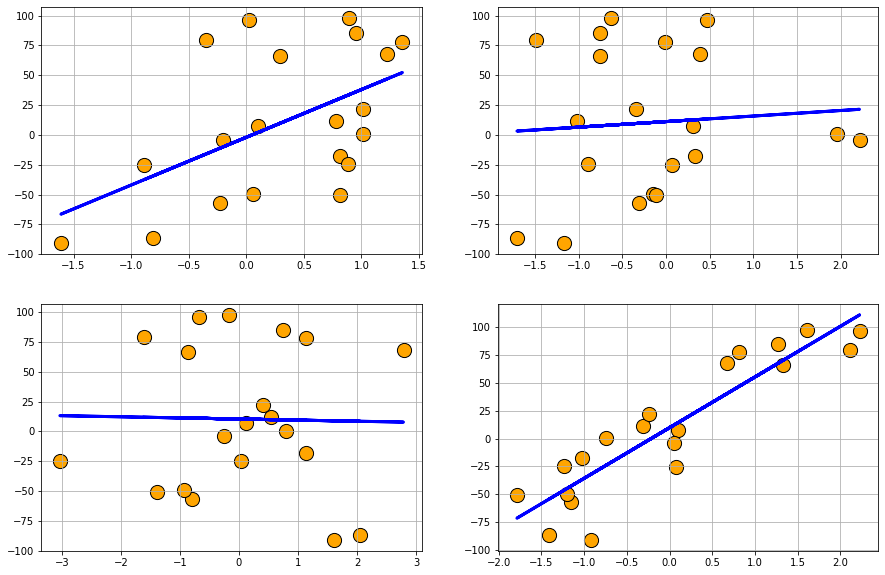

In [5]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df1[df1.columns[i-1]],df1['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df1[df1.columns[i-1]],df1['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df1[df1.columns[i-1]],fit_fn(df1[df1.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Data with Gaussian noise

In [6]:
data2 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=2.0, shuffle=True, coef=False, random_state=None)
df2 = pd.DataFrame(data2[0],columns=['x'+str(i) for i in range(1,5)])
df2['y'] = data2[1]

### Plot

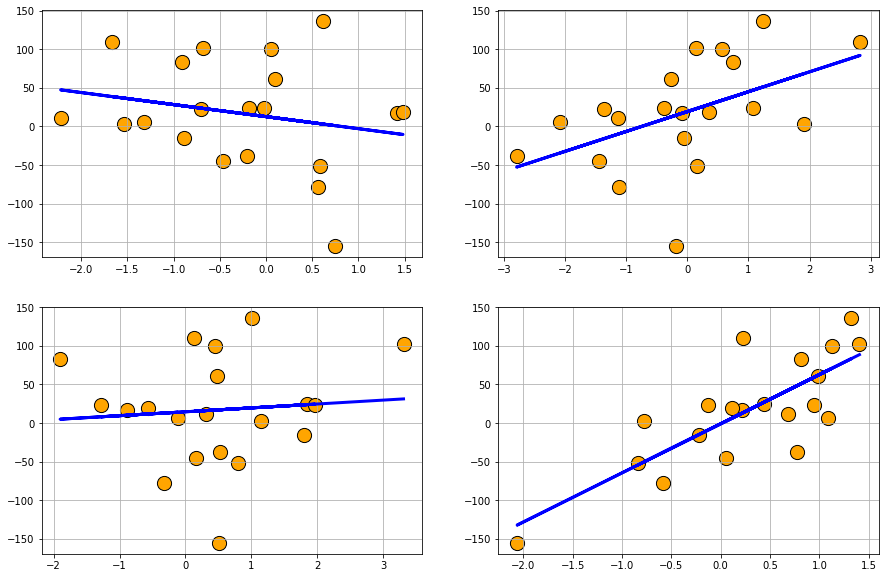

In [7]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df2[df2.columns[i-1]],df2['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df2[df2.columns[i-1]],df2['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df2[df2.columns[i-1]],fit_fn(df2[df2.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Plot datasets with varying degree of noise

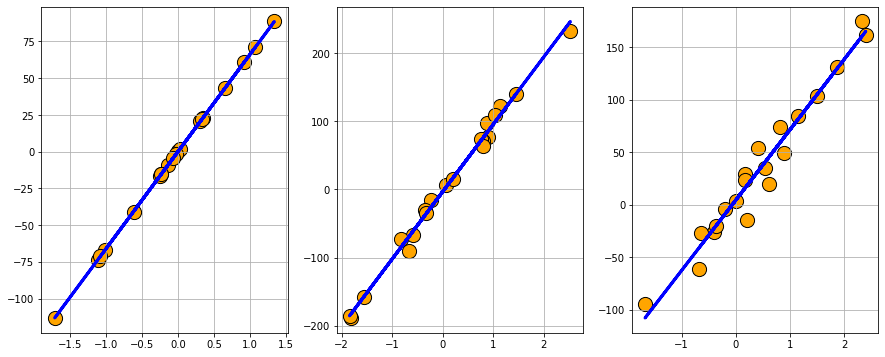

In [8]:
plt.figure(figsize=(15,6))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=i*10, shuffle=True, coef=False, random_state=None)
    df2['x'+str(i+1)]=data2[0]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    fit = np.polyfit(df2['x'+str(i+1)],df2['y'+str(i+1)],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)],df2['y'+str(i+1)],s=200,c='orange',edgecolor='k')
    plt.plot(df2['x'+str(i+1)],fit_fn(df2['x'+str(i+1)]),'b-',lw=3)
    plt.grid(True)

## Classification problem generation

In [9]:
from sklearn.datasets import make_classification

In [10]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

In [11]:
df3.head()

,x1,x2,x3,x4,y
0,-0.862308,0.905498,2.711808,2.274969,0
1,1.887125,0.116519,-0.280520,-1.352385,1
2,0.644714,1.664497,-0.964417,-0.291358,1
3,-0.343302,-0.178112,0.834575,0.373197,1
4,-0.278833,-0.411095,0.379102,-0.035278,1


### Plot

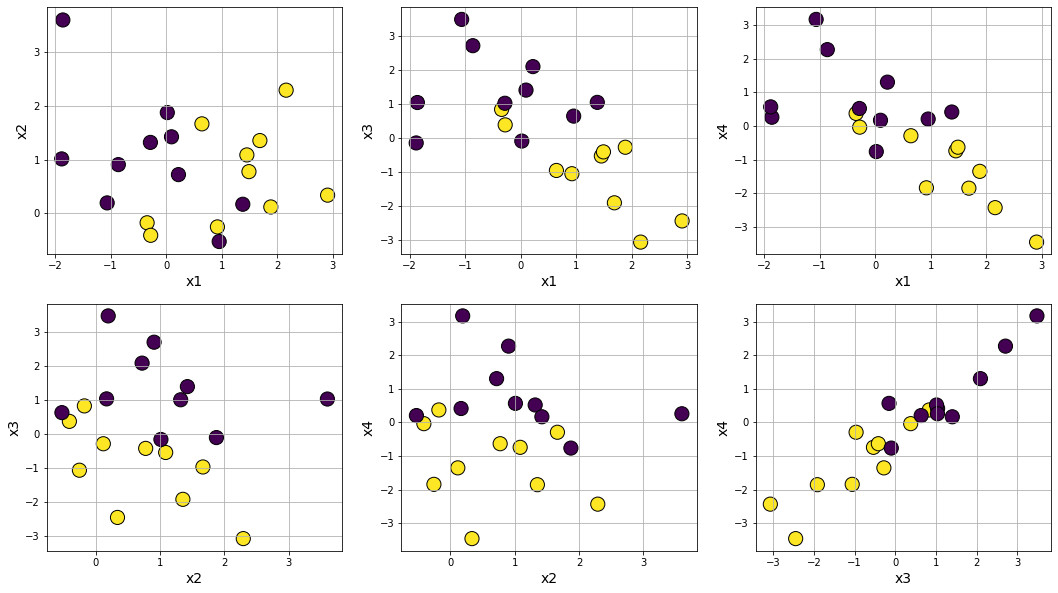

In [12]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation easy by tweaking `class_sep`

In [13]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=3.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

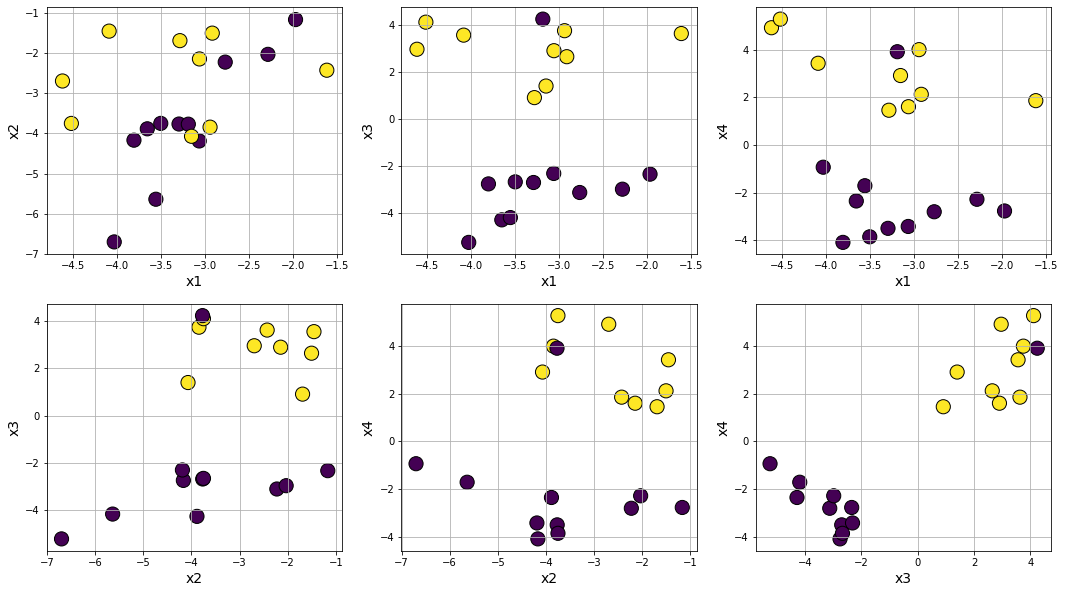

In [14]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation hard by tweaking `class_sep`

In [15]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=0.5, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

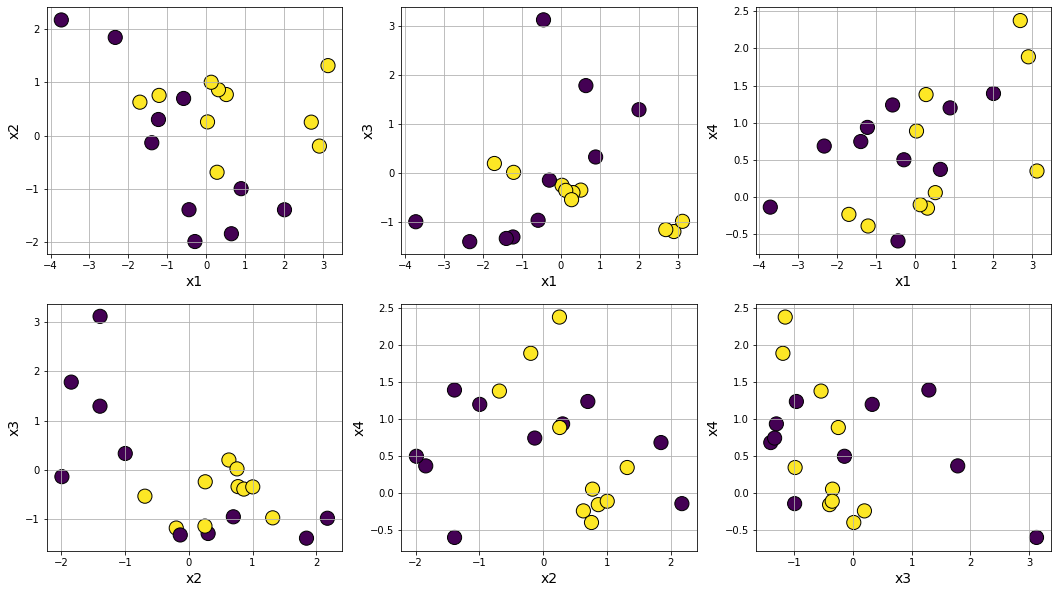

In [16]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making data noisy by increasing `flip_y`

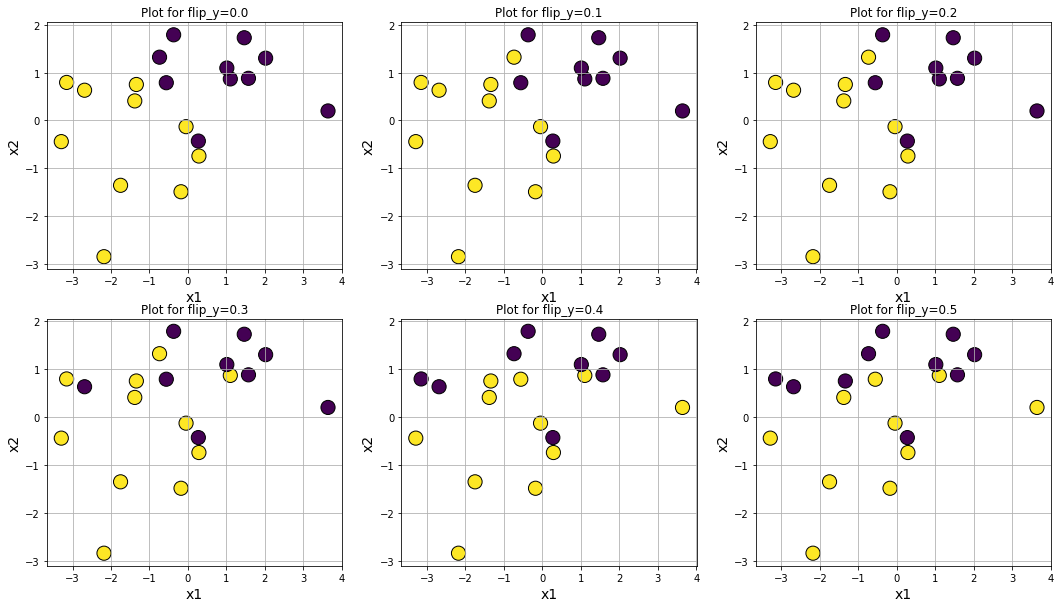

In [17]:
plt.figure(figsize=(18,10))
for i in range(6):
    data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.1*i, class_sep=1.0, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
    df3['y'] = data3[1]
    plt.subplot(2,3,i+1)
    plt.title(f"Plot for flip_y={round(0.1*i,2)}")
    plt.scatter(df3['x1'],df3['x2'],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.grid(True)

### Plot datasets with varying degree of class separation

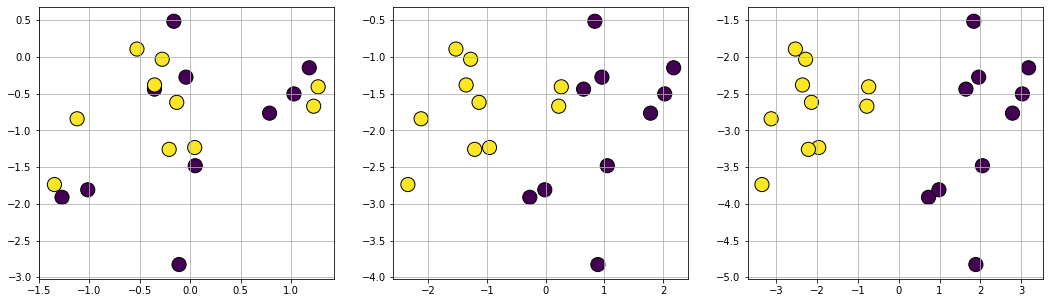

In [18]:
plt.figure(figsize=(18,5))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=i+0.5, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df2['x'+str(i+1)+'1']=data2[0][:,0]
    df2['x'+str(i+1)+'2']=data2[0][:,1]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)+'1'],df2['x'+str(i+1)+'2'],s=200,c=df2['y'+str(i+1)],edgecolor='k')
    plt.grid(True)

## Clustering problem generation

In [19]:
from sklearn.datasets import make_blobs

In [20]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

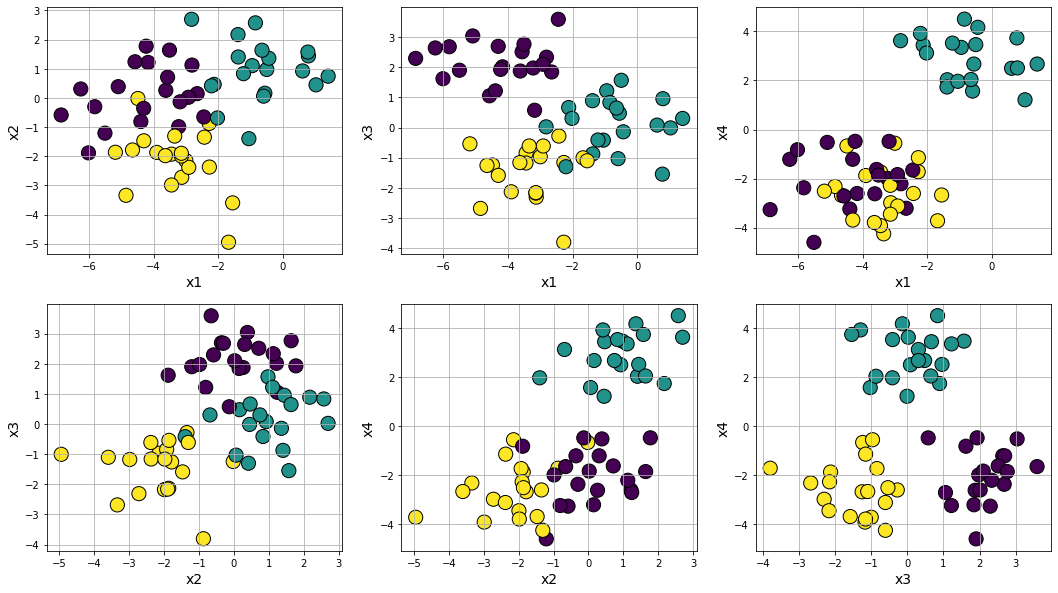

In [21]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters compact and easily separable by tweaking `cluster_std`

In [22]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=0.3, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

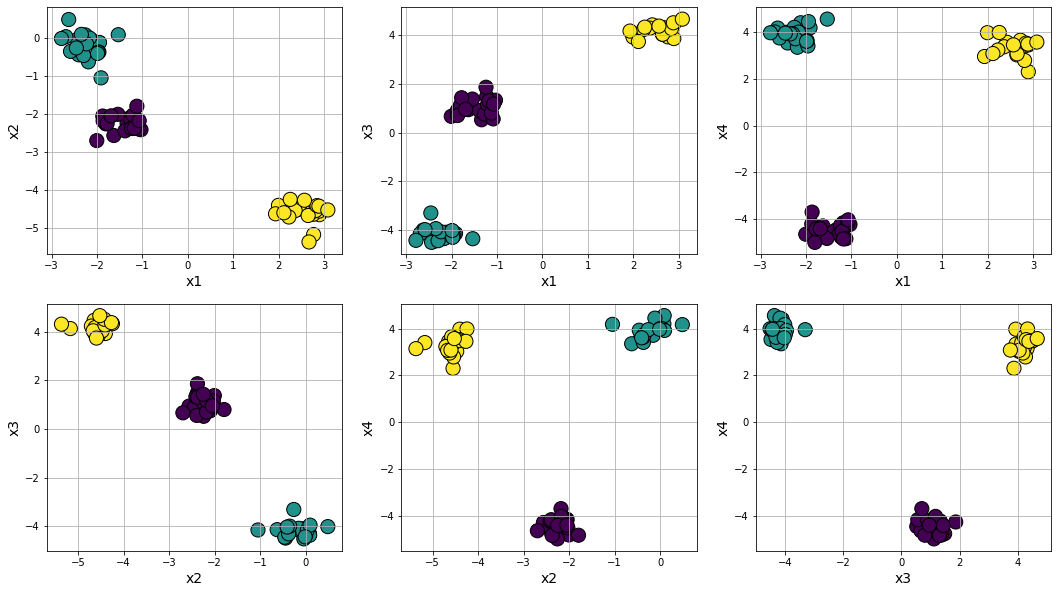

In [23]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters spread out and difficult to separate by tweaking `cluster_std`

In [24]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=2.5, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

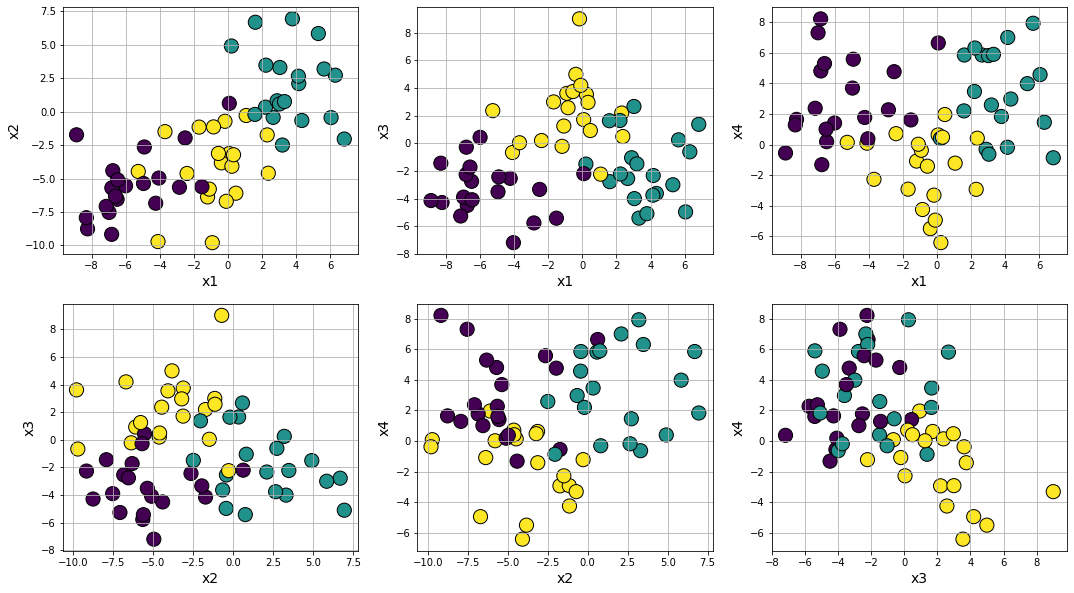

In [25]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making anisotropically distributed clustering problem

In [26]:
data5 = make_blobs(n_samples=50, n_features=2, centers=3,cluster_std=1.5)

In [27]:
transformation = [[0.5, -0.5], [-0.4, 0.8]]

In [28]:
data5_0=np.dot(data5[0],transformation)
df5 = pd.DataFrame(data5_0,columns=['x'+str(i) for i in range(1,3)])
df5['y'] = data5[1]

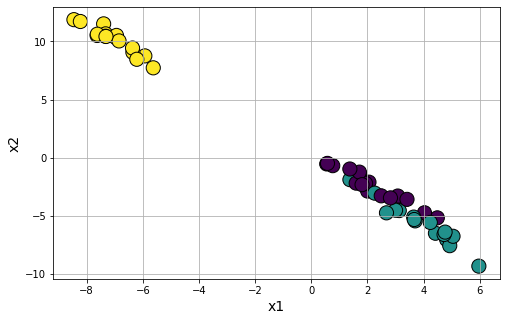

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df5['x1'],df5['x2'],c=df5['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Making concentric circle clusters

In [30]:
from sklearn.datasets import make_circles

In [31]:
data6 = make_circles(n_samples=50, shuffle=True, noise=None, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

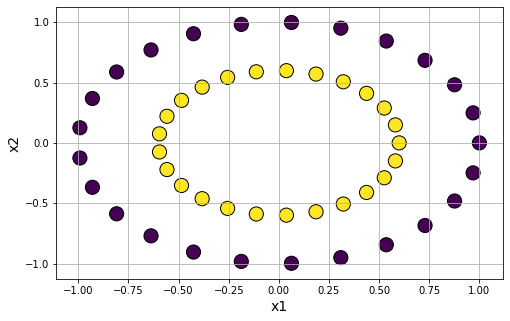

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introdue noise in the circle clusters

In [33]:
data6 = make_circles(n_samples=50, shuffle=True, noise=0.15, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

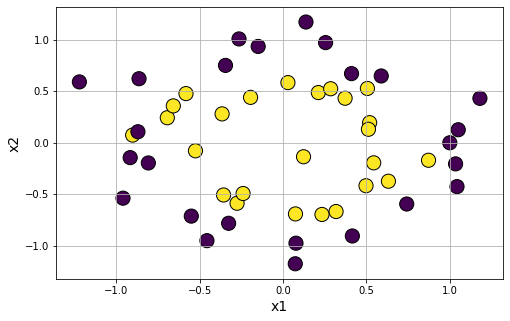

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Make moon shape clusters

In [35]:
from sklearn.datasets import make_moons

In [36]:
data7 = make_moons(n_samples=50, shuffle=True, noise=None, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

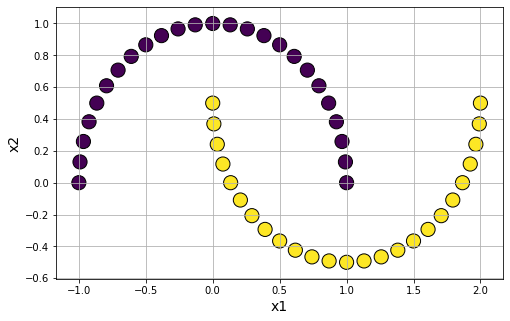

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introduce noise in the moon-shaped clusters

In [38]:
data7 = make_moons(n_samples=50, shuffle=True, noise=0.1, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

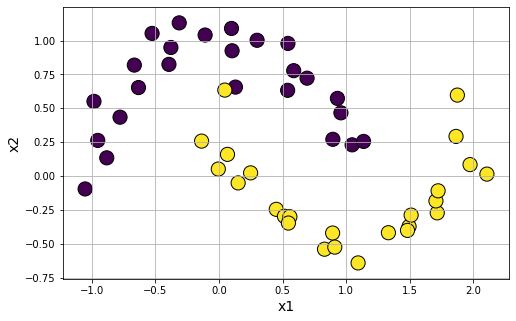

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

## Random regression/classification problem generation using symbolic function

In [40]:
from utils.Symbolic_regression_classification_generator import gen_regression_symbolic, gen_classification_symbolic

### Generate regression data with a symbolic expression of:
$$\frac{x_1^2}{2}-3x_2+20.\text{sin}(x_3)$$

In [41]:
data8 = gen_regression_symbolic(m='((x1^2)/2-3*x2)+20*sin(x3)',n_samples=50,noise=0.01)
df8=pd.DataFrame(data8, columns=['x'+str(i) for i in range(1,4)]+['y'])

In [42]:
df8.head()

,x1,x2,x3,y
0,4.06841,-6.32243,-6.82868,16.8571489230615
1,0.48965,-2.93668,-1.78867,-10.6125942095346
2,4.01232,2.92832,-0.169867,-4.11312311934141
3,4.9601,-13.5955,3.30762,49.7860812545327
4,-8.18186,4.66115,-3.4041,24.7047075181070


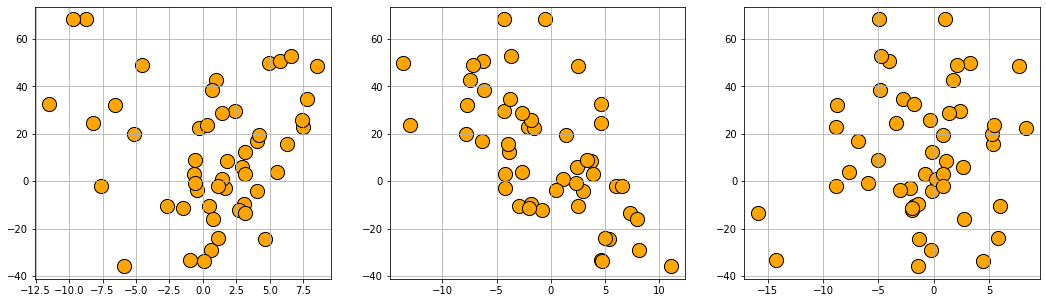

In [43]:
plt.figure(figsize=(18,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.scatter(df8[df8.columns[i-1]],df8['y'],s=200,c='orange',edgecolor='k')
    plt.grid(True)

### Generate regression data with a symbolic expression of:
$$x_1^2*sin(x_1)$$

In [44]:
data8 = 0.1*gen_regression_symbolic(m='x1^2*sin(x1)',n_samples=200,noise=0.05)
df8=pd.DataFrame(data8, columns=['x'+str(i) for i in range(1,2)]+['y'])

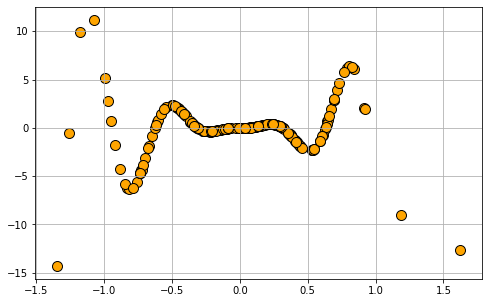

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(df8['x1'],df8['y'],s=100,c='orange',edgecolor='k')
plt.grid(True)

### Generate classification data with a symbolic expression of:
$$\frac{x_1^2}{3}-\frac{x_2^2}{15}$$

In [46]:
data9 = gen_classification_symbolic(m='((x1^2)/3-(x2^2)/15)',n_samples=500,flip_y=0.01)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,3)]+['y'])

In [47]:
df9.head()

,x1,x2,y
0,5.988649,5.598583,1.0
1,9.182945,0.552741,1.0
2,-1.666817,0.445267,1.0
3,8.237435,1.639419,1.0
4,-7.668525,4.314019,1.0


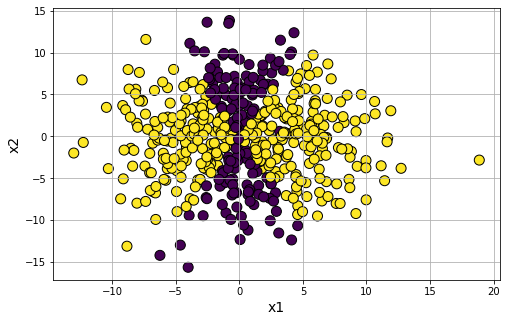

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(df9['x1'],df9['x2'],c=df9['y'],s=100,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Generate classification data with a symbolic expression of:
$$x_1-3.\text{sin}\frac{x_2}{2}$$

In [49]:
data9 = gen_classification_symbolic(m='x1-3*sin(x2/2)',n_samples=500,flip_y=0.01)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,3)]+['y'])

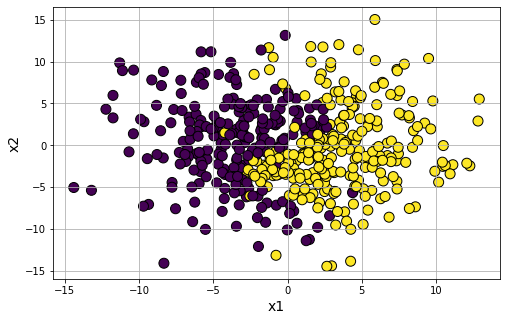

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(df9['x1'],df9['x2'],c=df9['y'],s=100,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

## Generate name, address, phone number, email etc. using `pydbgen` package

This is a package you need to install first with **`pip install pydbgen`**.

Full documentation about this package is available here: **[pydbgen documentation](https://pydbgen.readthedocs.io/en/latest/)**

In [51]:
from pydbgen import pydbgen

In [52]:
generator = pydbgen.pydb()

### Generate a license-plate (US style)

In [53]:
generator.license_plate()

'MVT-7896'

### Generate few random names

In [54]:
generator.gen_data_series(num=10,data_type='name')

0        Jessica Payne
1       Chad Rasmussen
2      Tracey Stafford
3       Maria Mitchell
4     Nancy Porter DDS
5      Amanda Campbell
6    Angela Ramirez MD
7       James Williams
8          Bryan Moore
9           Erin Price
dtype: object

### Generate random phone numbers

In [55]:
generator.simple_ph_num()

'304-852-1709'

In [56]:
generator.gen_data_series(num=10,data_type='phone_number_full')

0             07839562275
1          1-626-551-9282
2       (758)404-7585x840
3    1-837-007-7253x39801
4        962.528.6364x566
5      229.977.6824x68731
6      893-691-5308x57954
7            651-087-1927
8             00209764320
9             05159001534
dtype: object

### Generate a full data frame with random name, street address, SSN, email, date

In [59]:
df10 = generator.gen_dataframe(fields=['name','street_address','ssn','email','date'])

In [60]:
df10

,name,street_address,ssn,email,date
0,Nicholas Gordon,1571 Dean Inlet,869-34-8534,NGordon25@mail.com,2010-09-03
1,Roy Cohen,1250 Justin Isle,485-30-6690,Roy.Cohen22@aol.com,2002-07-14
2,Sherry Bailey,81494 Haley Ports Apt. 660,284-32-3626,SBailey55@hotmail.com,2003-10-10
3,Robert Lowe,98958 Lindsey Drive,652-89-9033,Robert.Lowe@yandex.com,1990-12-20
4,Lisa Stewart,625 Johnson Prairie,070-03-2098,Lisa.Stewart38@aol.com,2001-08-06
5,Penny Roberts,843 Adams Meadows,073-74-1250,Penny.Roberts@gmail.com,1996-06-16
6,Jessica Mckay,27545 Knox Parks,158-62-5188,Jessica_Mckay50@protonmail.com,1997-03-23
7,Emily Martinez,1935 Vernon Knoll,290-62-8073,EMartinez85@outlook.com,1996-12-21
8,Bradley Johnson,285 Brandon Trace Apt. 904,006-09-6412,Johnson.Bradley@gmail.com,2000-03-11
9,Joseph Thompson,66249 Vasquez Springs Apt. 510,217-54-9752,Joseph.T@comcast.net,1996-02-04
